# Логистическая регрессия

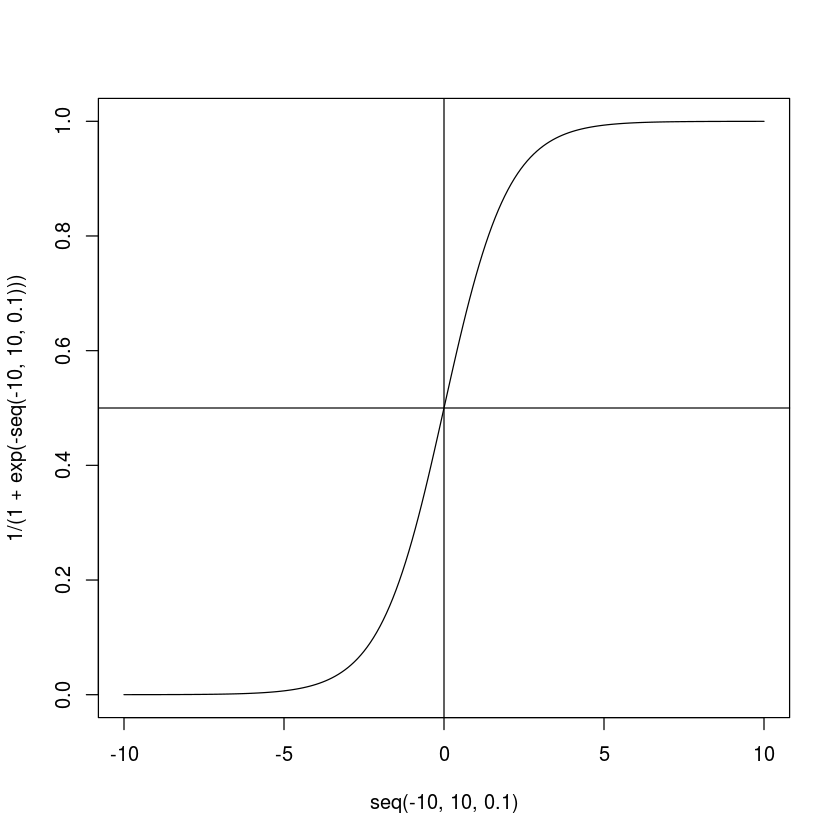

In [206]:
plot(seq(-10, 10, 0.1), 1 / (1 + exp(-seq(-10, 10, 0.1))), t="l")
abline(0.5, 0)
abline(v=0)

## Титаник

### Data Dictionary

| Variable | Definition	| Key |
|:---------|:-----------|:-----|
| survival | Survival| 	0 = No, 1 = Yes |
|pclass |	Ticket class |	1 = 1st, 2 = 2nd, 3 = 3rd |
|sex |	Sex 	|
|Age |	Age in years 	|
|sibsp | # of siblings / spouses aboard the Titanic 	|
|parch |	# of parents / children aboard the Titanic 	|
|ticket |	Ticket number 	|
|fare |	Passenger fare 	|
|cabin |	Cabin number |	
|embarked |	Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |


### Variable Notes

**pclass:** A proxy for socio-economic status (SES)
* 1st = Upper
* 2nd = Middle
* 3rd = Lower

** age: ** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

** sibsp: ** The dataset defines family relations in this way...

**Sibling**= brother, sister, stepbrother, stepsister

**Spouse ** = husband, wife (mistresses and fiancés were ignored)

** parch: ** The dataset defines family relations in this way...

** Parent ** = mother, father

** Child ** = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

### Задание:

Переменная Sex - должна быть фактором (так как она категориальная).

Построить логистическую регрессию, где зависимая переменная - "Survived", а зависимые - "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare". 

Посмотреть на результат. 

Что значат полученные коэффициенты?

### Функции R

`mydata <- read.csv(file)`

`summary(mydata)` - описательная статистика для всех переменных
датасета

`mydata$rank <- factor(mydata$rank)`

`mean(data$column1, na.rm = T)` - среднее не включая NA

`mydata <- mydata[, c("colname1", "colname2")]` - выборка столбцов из data.frame

`mylogit <- glm(Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare, data=data, family = "binomial")`

**Hint:** NA возраст можно заменить средним по больнице

In [203]:
raw.data <- read.csv("train.csv")
head(raw.data)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [204]:
summary(raw.data)

  PassengerId       Survived          Pclass     
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000  
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000  
 Median :446.0   Median :0.0000   Median :3.000  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309  
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000  
 Max.   :891.0   Max.   :1.0000   Max.   :3.000  
                                                 
                                    Name         Sex           Age       
 Abbing, Mr. Anthony                  :  1   female:314   Min.   : 0.42  
 Abbott, Mr. Rossmore Edward          :  1   male  :577   1st Qu.:20.12  
 Abbott, Mrs. Stanton (Rosa Hunt)     :  1                Median :28.00  
 Abelson, Mr. Samuel                  :  1                Mean   :29.70  
 Abelson, Mrs. Samuel (Hannah Wizosky):  1                3rd Qu.:38.00  
 Adahl, Mr. Mauritz Nils Martin       :  1                Max.   :80.00  
 (Other)                              :885                NA's   :177    
     Sib

Подчищенный и подготовленный датасет:

    Survived          Pclass          Sex           Age            SibSp      
 Min.   :0.0000   Min.   :1.000   female:314   Min.   : 0.42   Min.   :0.000  
 1st Qu.:0.0000   1st Qu.:2.000   male  :577   1st Qu.:22.00   1st Qu.:0.000  
 Median :0.0000   Median :3.000                Median :29.70   Median :0.000  
 Mean   :0.3838   Mean   :2.309                Mean   :29.70   Mean   :0.523  
 3rd Qu.:1.0000   3rd Qu.:3.000                3rd Qu.:35.00   3rd Qu.:1.000  
 Max.   :1.0000   Max.   :3.000                Max.   :80.00   Max.   :8.000  
     Parch             Fare       
 Min.   :0.0000   Min.   :  0.00  
 1st Qu.:0.0000   1st Qu.:  7.91  
 Median :0.0000   Median : 14.45  
 Mean   :0.3816   Mean   : 32.20  
 3rd Qu.:0.0000   3rd Qu.: 31.00  
 Max.   :6.0000   Max.   :512.33  

Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.00000,1,0,7.2500
1,1,female,38.00000,1,0,71.2833
1,3,female,26.00000,0,0,7.9250
1,1,female,35.00000,1,0,53.1000
0,3,male,35.00000,0,0,8.0500
0,3,male,29.69912,0,0,8.4583



Call:
glm(formula = Survived ~ Pclass + Sex + Age + SibSp + Parch + 
    Fare, family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7129  -0.6032  -0.4273   0.6191   2.4186  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  4.960445   0.532937   9.308  < 2e-16 ***
Pclass      -1.084297   0.139119  -7.794 6.49e-15 ***
Sexmale     -2.762930   0.199011 -13.883  < 2e-16 ***
Age         -0.039702   0.007797  -5.092 3.55e-07 ***
SibSp       -0.350725   0.109552  -3.201  0.00137 ** 
Parch       -0.111963   0.117400  -0.954  0.34024    
Fare         0.002852   0.002361   1.208  0.22718    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1186.66  on 890  degrees of freedom
Residual deviance:  788.73  on 884  degrees of freedom
AIC: 802.73

Number of Fisher Scoring iterations: 5


## Test

### Задание

Привести тестовый датасет к виду, на котором учились

Применить логит регрессию к тестовому датасету

Посчитать accuracy и log-loss

### Функции в R
`predicted <- predict(mylogit, test, type="response")` - испоьзуем модель на новых данных

In [132]:
raw.test <- read.csv("test.csv")

In [147]:
head(raw.test)

X,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
1,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q,0
2,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S,1
3,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q,0
4,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S,0
5,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S,1
6,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S,0


In [182]:
raw.test <- raw.test[!is.na(raw.test$Fare),]

Отделим отклик, чтобы потом сравнить с нашим результатом

In [184]:
y.test <- raw.test$Survived

Приведем датасет к формату, на котором строили логит

In [208]:
summary(test)

     Pclass          Sex           Age            SibSp            Parch       
 Min.   :1.000   female:152   Min.   : 0.17   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:1.000   male  :265   1st Qu.:23.00   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :3.000                Median :29.70   Median :0.0000   Median :0.0000  
 Mean   :2.264                Mean   :30.08   Mean   :0.4484   Mean   :0.3933  
 3rd Qu.:3.000                3rd Qu.:35.00   3rd Qu.:1.0000   3rd Qu.:0.0000  
 Max.   :3.000                Max.   :76.00   Max.   :8.0000   Max.   :9.0000  
      Fare        
 Min.   :  0.000  
 1st Qu.:  7.896  
 Median : 14.454  
 Mean   : 35.627  
 3rd Qu.: 31.500  
 Max.   :512.329  

### Accuracy

In [220]:
acc <- function(y.pred, y.real) {
    return(0)
}

In [221]:
acc(predicted, y.test)

[1] 0.9376499

Accuracy рандома

In [225]:
acc(runif(length(y.test), 0, 1), y.test)

[1] 0.5155875

### Log-loss

In [227]:
log.loss <- function(y.pred, y.real) {
    return (0)
}

In [228]:
log.loss(predicted, y.test)

[1] 0.271689

Log loss рандома

In [229]:
log.loss(rand, y.test)

[1] 0.9659805